# Project: Investigate the Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description 
> In this project, I'm going to analyze data of more than 10,000 movies in The Movie Database (TMDB) to find out trends among different movies and genres, their popularity, runtime, number of stars, user ratings and profit, as well as the correlation among them.

### Questions for Analysis
1. Which movie is the most popular? Which movie is the least popular?
2. What is the average duration of a movie? How does this number fluctuate overtime?
3. What is the average number of stars in a movie? How does this number fluctuate overtime?
4. What is the most expensive movie ever made?
5. What is the most profitable movie? What is the highest-grossing movie?
6. What genres could generate more than 30 million USD in profit?
7. Which 10 actors appear most in movies that have profit above 30 million USD?
8. Does popular movies have the positive correlation to the number of votes?
9. How is the correlation between popularity and budget / revenue / profit?
10. Does a higher budget correlate with higher revenue and profit?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
df = pd.read_csv('D:/COURSE/Nanodegree Udacity/Data Analyst/Project/Project 2 - TMDb/tmdb-movies.csv')

# View the first 5 rows
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Overall observation
* There are *10,866 rows* and *21 columns* in the dataset.
* Each row is a movie and each column shows its associated information such as `popularity`, `budget`, `revenue`, `cast`, `director`, etc. 
* Certain columns like `cast`, `genres`, `production_companies` and `keywords` contain multiple values separated by pipe characters (|).
* I would assume the currency of `budget` and `revenue` is US dollars, since the dataset doesn't provide their units. 

#### Column Description

| **Columns**             | **Description**                                |
|-------------------------|:-----------------------------------------------|
|  `id`                   | unique identifier of each movie                |
|  `imdb_id`              | unique identifier of each movie on IMDB        |
|  `popularity`           | popularity score                               |
|  `budget`               | budget in US dollars                           |
|  `revenue`              | revenue in US dollars                          |
|  `original_title`       | the original title                             |
|  `cast`                 | names of the cast                              |
|  `homepage`             | website                                        |
|  `director`             | director(s)                                    |
|  `tagline`              | movie tagline                                  |
|  `keywords`             | highlighed words about the movie               |
|  `overview`             | short description                              |
|  `runtime`              | total duration of a movie or a TV series       |
|  `genres`               | movie type                                     |
|  `production_companies` | companies that produce the movie               |
|  `release_date`         | release date                                   |
|  `vote_count`           | the number of votes                            |
|  `vote_average`         | voting score on average                        |
|  `release_year`         | release year                                   |
|  `budget_adj`           | inflation-adjusted budget in 2010 US dollars   |
|  `revenue_adj`          | inflation-adjusted revenue in 2010 US dollars  |

In [4]:
# Check the number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

We have 10,866 rows but only 10,865 unique values in `id`. There might be 1 duplicated row in our dataset.

In [5]:
# Confirm the number of duplicated row(s)
sum(df.duplicated())

1

In [6]:
# Check the number NULL values in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Columns that have NULL values are `imdb_id`, `cast`, `hompage`, `director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`. Noticed that they are all descriptive.

In [7]:
# Summary statistics of our dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


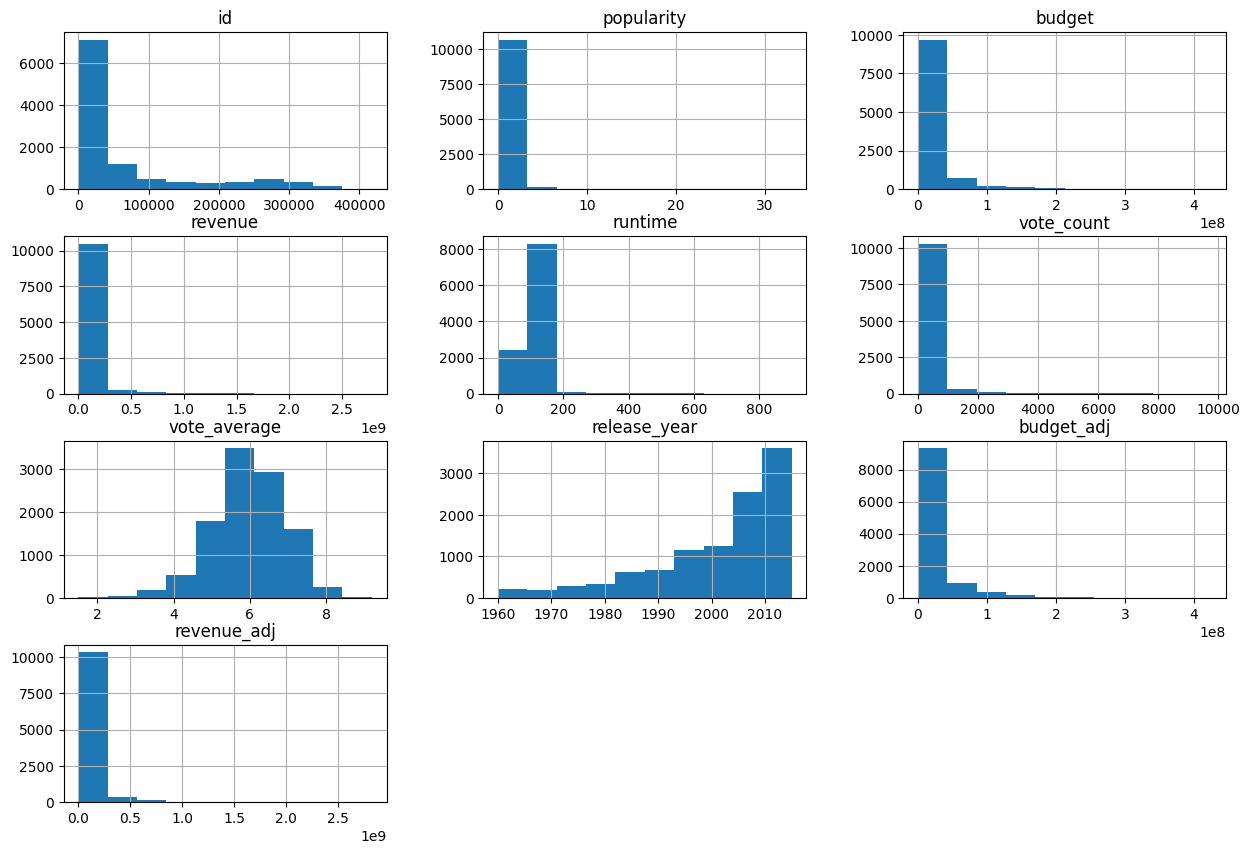

In [8]:
# Let's look at the distribution of each numeric column 
df.hist(figsize =(15,10));

#### Notices
* Our dataset has movie data from 1960 to 2015, but mostly between 2006 and 2011.
* There are '0' values in `budget`, `revenue`, and `runtime`. More than 50% of data in `budget`and `revenue` is '0'.
* 6 is the most popular voting score. Noticed that some movies have the low number of `vote_count`, so it might affect the `vote_average`.

In [9]:
# Check the percentage of '0' value in 'budget'
df.budget[df.budget == 0].count() / len(df) * 100

52.42039388919566

In [10]:
# Check the percentage of '0' value in 'revenue'
df.revenue[df.revenue == 0].count() / len(df) * 100

55.365359838026876

In [11]:
# Check the percentage of '0' value in 'runtime'
df.runtime[df.runtime == 0].count() / len(df) * 100

0.2852935762930241

#### Next steps
* Delete 1 duplicate row
* Remove unnessary columns, including `imdb_id`, `budget_adj`, `revenue_adj`, `homepage`, `keywords`, `tagline`, `overview` and `release_date`
* Add 2 columns `profit` and `profit_margin` to analyze profit
* Discard rows that have '0' values in `budget` and `revenue` in profit-related analysis so they won't distort our conclusion. 
* Discard rows that have '0' values in `runtime`in runtime-related analysis so they won't distort our conclusion.

### Data Cleaning


In [12]:
# Delete duplicates except for the first occurrence
df.drop_duplicates(keep='first', inplace=True)
df.shape

(10865, 21)

We have *10,865 rows* and *21 columns* now.

In [13]:
# Remove unnessary columns
df.drop(['imdb_id','budget_adj','revenue_adj','homepage','keywords','tagline','overview','release_date'], axis=1, inplace=True)

# Confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [14]:
df.shape

(10865, 13)

We only have *10,865 rows* and *13 columns* now.

In [15]:
# Add two columns: 'profit' and 'profit margin'
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit'] / df['revenue'] * 100

# Confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,90.089386
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,60.363216
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,62.741949
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225,90.329654
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360,87.385887


In [16]:
# See the number of columns and rows after cleaning
df.shape

(10865, 15)

After cleaning data, we have *10,865 rows* and *15 columns*.

<a id='eda'></a>
## Exploratory Data Analysis
### Q1. Which movie is the most popular? Which movie is the least popular?

In [17]:
# Most popular movie
df[df['popularity'] == df['popularity'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,90.089386


In [18]:
# Least popular movie
df[df['popularity'] == df['popularity'].min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin
6181,18729,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,561,Drama|History|Western,NaN,17,6.0,1985,0,NaN


* The **most popular** movie is **Jurassic World**.
* The **least popular** movie is **North and South, Book I**.

### Q2. What is the average runtime of a movie? How does this number fluctuate overtime?

In [19]:
# Discard '0' values in 'runtime' column
df_runtime = df[df.runtime > 0]

# Check the 'df_runtime' dataframe
df_runtime.shape

(10834, 15)

In [20]:
# The average runtime of a movie
df_runtime['runtime'].mean()

102.3638545320288

The average runtime of a movie is about **102 minutes**.

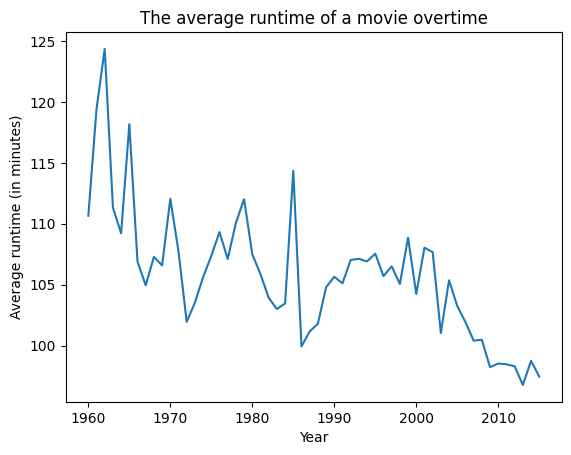

In [21]:
# Group the averages by 'release_year' and plot the result
df_runtime.groupby('release_year')['runtime'].mean().plot(title = 'The average runtime of a movie overtime',
                                                          xlabel = 'Year', ylabel = 'Average runtime (in minutes)');

It seems like **movies are becoming shorter overtime**.

### Q3. What is the average number of stars in a movie? How does this number fluctuate overtime?

In [22]:
# Check the percentage of NULL values in'cast'
df.cast.isna().sum() / len(df) * 100

0.6994937873907041

Only 0.7% values in `cast` column is NULL.

To solve the first part of this question, I will 
* Create a new collumn called `num_cast` based on the below condition:
    * For NOT NULL values in `cast`, the number of stars = the number of ' | ' character + 1.
    * For NULL values in `cast`, I assume the number of stars is 0. 
* Calculate the mean of `num_cast`
* Group the mean of `num_cast` by `release_year` to see how it fluctuates overtime
* Plot the result

In [23]:
# Create 'num_cast' column based on values in 'cast' 
df['num_stars'] = np.where(df['cast'].notna(), df['cast'].str.count('|') + 1, 0)

In [24]:
# Confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin,num_stars
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,90.089386,77.0
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,60.363216,71.0
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,62.741949,68.0
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225,90.329654,66.0
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360,87.385887,72.0


In [25]:
# Calculate the average number of stars in a movie
df['num_stars'].mean()

69.3837091578463

The **average number of stars** in a movie is about **70**.

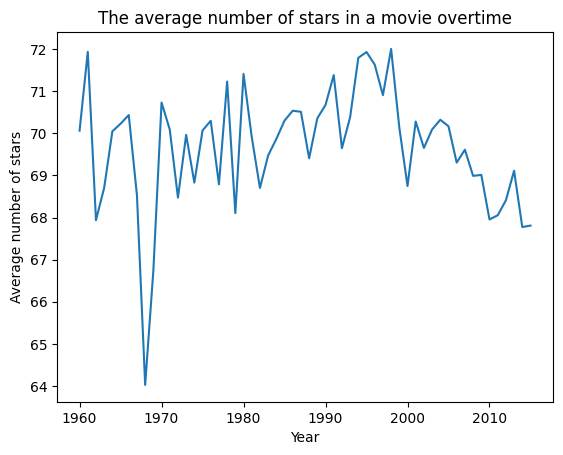

In [26]:
# Group the averages by 'release_year' and plot the result
df.groupby('release_year')['num_stars'].mean().plot(title = 'The average number of stars in a movie overtime',
                                                    xlabel = 'Year', ylabel = 'Average number of stars');

The average number of stars in a movie fluctuates **between 64 and 72**, but **mostly between 68 and 72 overtime**.

### Q4. What is the most expensive movie ever made?

In [27]:
df[df.budget == df.budget.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin,num_stars
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,-413912431,-3733.12158,64.0


The most expensive movie ever made is **The Warrior's Way**. Its budget is about 425 million USD.

### Q5. What is the most profitable movie? What is the highest grossing movie?

Since `budget` and `revenue` account more than 50% of our dataset, I'm going to filter them out.

In [28]:
# Filter out movies that have '0' in 'budget' and 'revenue' 
df_profit = df.query('budget > 0 & revenue > 0')

# Summary statistics of df_profit
df_profit.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit,profit_margin,num_stars
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,7.048292e+07,-4.795366e+05,71.126362
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,1.506195e+08,1.139732e+07,7.219438
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08,-4.166666e+08,0.000000
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,-1.321535e+06,-1.407866e+01,67.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,2.002019e+07,5.282328e+01,71.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,8.170331e+07,7.624954e+01,75.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09,9.999990e+01,105.000000


In [29]:
# Movie that has highest profit
df_profit[df_profit['profit'] == df_profit['profit'].max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin,num_stars
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2544505847,91.479435,78.0


**Avatar** is the most profitable movie (~2.5 billion USD) with the profit margin at about 92%.

In [30]:
# Movie that has lowest profit
df_profit[df_profit['profit'] == df_profit['profit'].min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,profit_margin,num_stars
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010,-413912431,-3733.12158,64.0


**The Warrior's Way** is the highest-grossing movie with the profit margin is about -3733%.
Interestingly, it is also the most expensive movie ever made.

### Q6. What genres could generate more than 30 million USD in profit?

In [31]:
# Filter movies that generate more than 30 million USD in profit
profitable_movies = df_profit.query('profit > 30000000')

To solve this question, we need to separate each value in `genres` to multiple rows
* Split the string in `genres` around the delimiter (|)
* Turn each value in `genres` to a separated row
* Count the number of genres and sort the count in ascending order, so the horizontal bar chart will appear in descending order

In [32]:
# Genres of profitable movies
profitable_genres = profitable_movies['genres'].str.split('|').explode().value_counts(ascending=True)
profitable_genres

TV Movie             1
Foreign              1
Documentary          8
Western             19
War                 53
History             54
Music               58
Animation          134
Mystery            139
Horror             169
Fantasy            223
Science Fiction    242
Family             260
Crime              262
Romance            277
Adventure          431
Thriller           508
Action             546
Comedy             606
Drama              634
Name: genres, dtype: int64

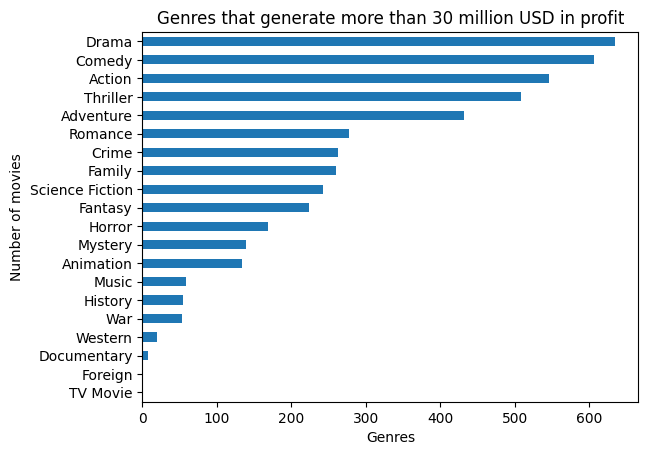

In [33]:
# Plot the result
profitable_genres.plot(kind='barh',
                       title='Genres that generate more than 30 million USD in profit',
                       xlabel='Genres', ylabel = 'Number of movies');

Top 5 profitable genres are **Drama, Comedy, Action, Thriller and Adventure**.

### Q7. Which 10 actors appear most in movies that have profit above 30 million USD?

To solve this question, we need to separate each value in `cast` to multiple rows
* Split the string in `cast` around the delimiter (|)
* Turn each value in `cast` to a separated row
* Count the number of actors and sort the count in ascending order, so the horizontal bar chart will appear in descending order
* Plot 10 actors that appear most

In [34]:
# 10 actors that are in profitable movies
profitable_actors = profitable_movies['cast'].str.split('|').explode().value_counts(ascending=True).tail(10)
profitable_actors

Harrison Ford         20
Sylvester Stallone    21
Bruce Willis          22
Johnny Depp           22
Eddie Murphy          23
Cameron Diaz          23
Robert De Niro        24
Brad Pitt             26
Tom Hanks             27
Tom Cruise            28
Name: cast, dtype: int64

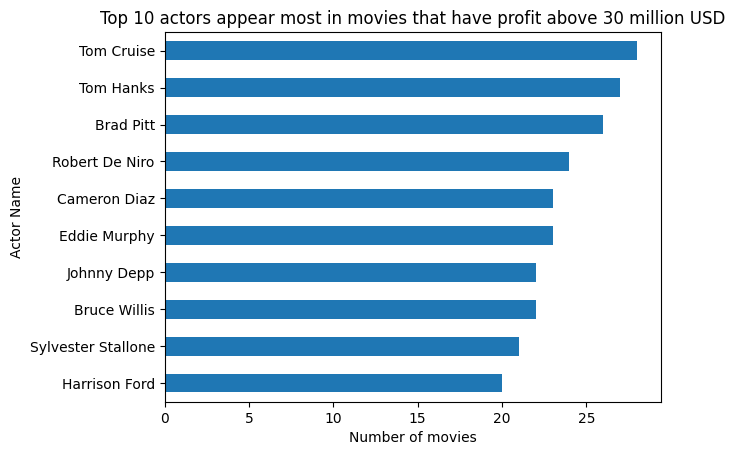

In [35]:
# Plot the result
profitable_actors.plot(kind='barh', 
                       title='Top 10 actors appear most in movies that have profit above 30 million USD',
                       xlabel = 'Number of movies',
                       ylabel = 'Actor Name');

### Q8. Does popular movies have the positive correlation with the number of votes?

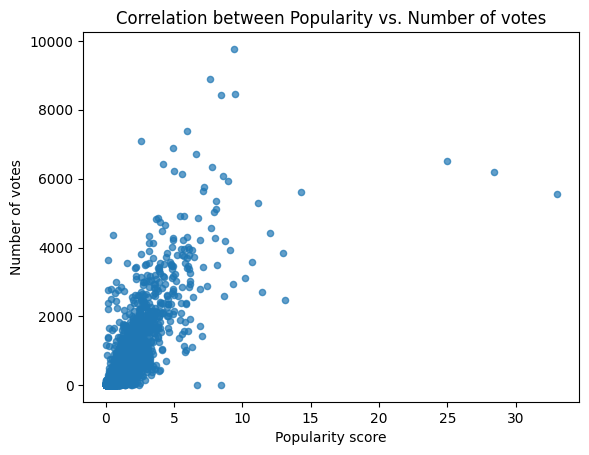

In [36]:
# Plot the 'popularity' and 'voting_count'
df.plot(kind='scatter', title='Correlation between Popularity vs. Number of votes',
        x='popularity', y='vote_count',
        xlabel='Popularity score', ylabel='Number of votes',
        alpha=0.7,
        s=20);

Yes, popularity score and the number of votes have the positive correlation.

### Q9. How is the correlation between popularity and budget / revenue / profit?

In [37]:
# Create a function
def scatterplot_popularity (x, y, xlabel, ylabel, color=None, blur=None, size=None):
    plt.style.use('ggplot')
    plt.title("Correlation between {} and {}".format(xlabel, ylabel))
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.scatter(x, y, c=color, alpha=blur, s=size)
    plt.show();
    
# Choose columns and units
x_pop = df_profit['popularity']
y_bud = df_profit['budget'] / 1000000
y_rev = df_profit['revenue'] / 1000000
y_pro = df_profit['profit'] / 1000000

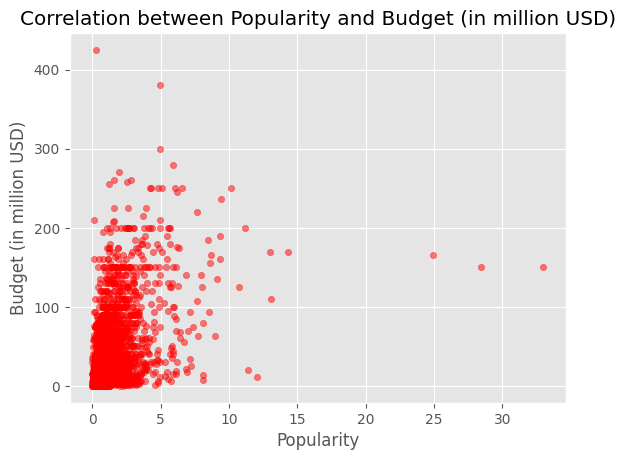

In [38]:
# Plot the correlation between Popularity & Budget
scatterplot_popularity (x_pop, y_bud,
                        xlabel = 'Popularity', ylabel = 'Budget (in million USD)', 
                        color='red', blur=0.5, size=20)

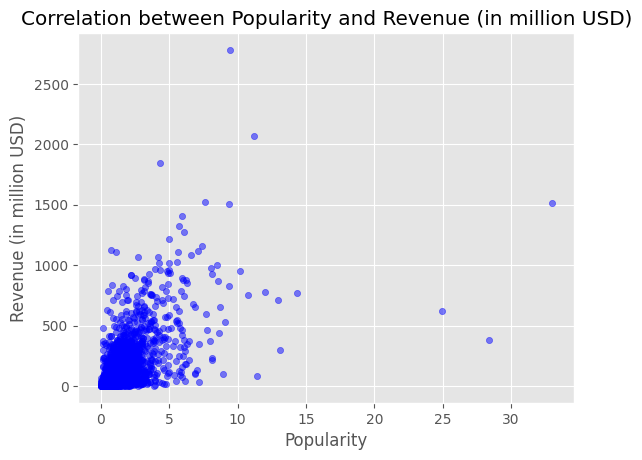

In [39]:
# Plot the correlation between Popularity & Revenue
scatterplot_popularity (x_pop, y_rev,
                        xlabel = 'Popularity', ylabel = 'Revenue (in million USD)', 
                        color='blue', blur=0.5, size=20)

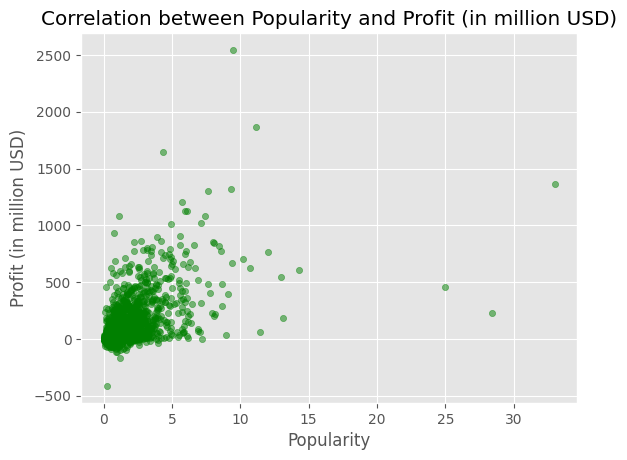

In [40]:
# Plot the correlation between Popularity & Profit
scatterplot_popularity (x_pop, y_pro,
                        xlabel = 'Popularity', ylabel = 'Profit (in million USD)', 
                        color='green', blur=0.5, size=20)

In [41]:
# Confirm by using formula
print("The coefficient correlation between Popularity and Budget is", x_pop.corr(y_bud))
print("The coefficient correlation between Popularity and Revenue is", x_pop.corr(y_rev))
print("The coefficient correlation between Popularity and Profit is", x_pop.corr(y_pro))

The coefficient correlation between Popularity and Budget is 0.44698669304000505
The coefficient correlation between Popularity and Revenue is 0.6155346545546605
The coefficient correlation between Popularity and Profit is 0.5962013674920569


Popularity **all have positive correlation** with Budget, Revenue or Profit. 

The relationship between **Popularity with Revenue is strongest, then with Profit, and finally with Budget**.

### 10. Does a higher budget result in higher revenue and profit?

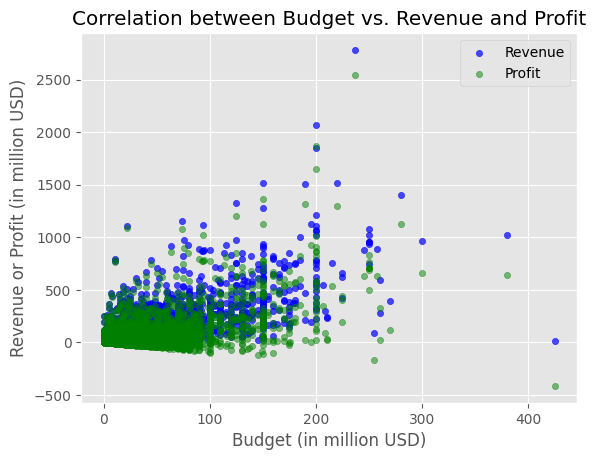

In [42]:
# Choose columns and change units
x = df_profit['budget'] / 1000000
y_rev = df_profit['revenue'] / 1000000
y_prof = df_profit['profit'] / 1000000

# Plot the 'budget' vs. 'revenue' & 'profit'
plt.style.use('ggplot')

plt.title('Correlation between Budget vs. Revenue and Profit')
plt.xlabel('Budget (in million USD)')
plt.ylabel('Revenue or Profit (in million USD)')

plt.scatter(x, y_rev, label = 'Revenue', alpha=0.7, s=20, c='blue')
plt.scatter(x, y_prof, label = 'Profit', alpha=0.5, s=20, c='green')

plt.legend()
plt.show();

From the plot above, we can conclude that Budget vs. Revenue and Profit are correlated. 

However, correlation doesn't imply causation. We still need more tests to confirm that whether or not higher budget will lead to higher revenue and profit.

<a id='conclusions'></a>
## Conclusions


1. The most popular movie is Jurassic World. The least popular movie is North and South, Book I.


2. The average runtime of a movie is about 102 minutes. Movies are becoming shorter overtime.


3. The average number of stars in a movie is 70, but it fluctuates between 64 and 72 overtime.


4. The most expensive movie ever made is The Warrior's Way. Its budget is about 425 million USD.


5. Avatar is the most profitable movie with more than 2.5 billion USD in profit and profit margin is about 92%. The Warrior's Way is the highest-grossing movie with more than -4.1 million USD in profit and profit margin is about -3733%.


6. Top 5 genres can generate more than 30 million USD in profit are Drama, Comedy, Action, Thriller and Adventure.


7. 10 actors appear most in movies that have profit above 30 million USD are Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Cameron Diaz, Eddie Murphy, Johnny Depp, Bruce Willis, Sylvester Stallone, and Harrison Ford.


8. Popular movies and the number of votes have the positive correlation.


9. Popularity all have the positive correlation with Budget, Revenue and Profit. The relationship between Popularity with Revenue is strongest, then with Profit, and finally with Budget. 


10. Budget vs. Revenue and Profit are correlated.

<a id='limitations'></a>
## Limitations

- More than 50% of data in budget and revenue is '0', so the result of the profit analysis doesn't represent the rest.


- The dataset doesn't have a column to separate whether it is a movie (short film) or TV series (long film), hence the average runtime may not be accurate.


- The dataset doesn't provide the currency of budget and revenue. I'm not sure if they are USD or not.


- The dataset doesn't provide the unit and calculation logic of popularity score.


- We still need more statistical tests to confirm whether higher popularity score will lead to with higher number of votes, budget, or revenue. The same goes for the relationship between budget with revenue and profit.